# People Category Vs Time Spent on Ford Go-Bikes (for Feb 2019)

## Investigation Overview

In this investigation, I wanted to look at the categories of poeple that used Ford Go-bikes more . The main focus was on the qualitative types:
- user_type
- age_group
- member_gender

## Dataset Overview

The data consists of duration time and attributes of exactly 183412 instances before cleaning and exactly 174952 instances after cleaning. The attributes include the four qualitative variables mentioned earlier, as well as additional measurements such as:
- start_station_longitude
- end_station_longitude
- start_station_latitude
- end_station_latitude
- start_station_names
- end_station_names
- bike_ids
- bike_share_for_all_trip




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



In [2]:
ford_bike=pd.read_csv('fordbike_02-2019.csv')

## Assess

#### <font color=purple>Visual Assessment</font></br>

In [3]:
ford_bike.shape

(183412, 16)

In [4]:
ford_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
ford_bike.duplicated().sum()

0

### Assessment
#### <font color=purple>Quality</font>
- There are null values in start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender. this should be dropped as there is no way of getting these data.
- member_birth_year should be int
- Start and End times should be in datetime format.
- user_type,member_gender and  bike_share_for_all_trip should be changed to categorical.
- since we will be concerned with day of the week and time of the day it will be wise to create new columns for these.
- it will be more readable putting the duration_sec variable in minutes.
- it would be nice to convert our member_birth_year to actual user age.

### Cleaning

In [8]:
fordbike=ford_bike.copy()

In [9]:
# Addressing the first bullet point
fordbike.dropna(axis=0,inplace=True)

In [10]:
# check for null
fordbike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:

# create function to check type
def check_type(x):
    for var in x:
        print(f'{var} ----> {fordbike[var].dtype}')
    

In [12]:
# convert usertype, member_gender bike_share_for_all_trip to categorical type
varss =['user_type','member_gender','bike_share_for_all_trip']
for var in varss:
    fordbike[var]=fordbike[var].astype('category')
# check conversion
check_type(varss)

user_type ----> category
member_gender ----> category
bike_share_for_all_trip ----> category


In [13]:
# convert start_time and end_time to datetime format
varss=['start_time','end_time']
for var in varss:
    fordbike[var]=pd.to_datetime(fordbike[var])
    
check_type(varss)

start_time ----> datetime64[ns]
end_time ----> datetime64[ns]


In [14]:
# convert birth year to int
fordbike.member_birth_year=fordbike.member_birth_year.astype('int')

In [15]:
# extract am or pm and store in new column
fordbike['time_of_day']=pd.to_datetime(fordbike.start_time).dt.strftime('%p')
# check column
fordbike.time_of_day

0         PM
2         PM
3         PM
4         PM
5         PM
          ..
183407    AM
183408    AM
183409    AM
183410    AM
183411    AM
Name: time_of_day, Length: 174952, dtype: object

In [16]:
# extract day of the week to 'day_of_week' column
fordbike['day_of_week']=pd.to_datetime(fordbike.start_time).dt.strftime('%A')
# check column
fordbike['day_of_week']

0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: day_of_week, Length: 174952, dtype: object

In [17]:
# rename duration_sec to duration_min and convert to int
def renameColumn(old_name,new_name):
    fordbike.rename(columns={old_name:new_name},inplace=True)
# change column name
renameColumn('duration_sec','duration_min')
fordbike.duration_min=fordbike.duration_min / 60
# fordbike.duration_min=fordbike.duration_min.astype('int')

# check fordbike.duration_min column
fordbike.duration_min

0          869.750000
2         1030.900000
3          608.166667
4           26.416667
5           29.883333
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_min, Length: 174952, dtype: float64

In [18]:
# rename member_birth_year to user_age
renameColumn('member_birth_year','user_age')
# convert birth_year to age
fordbike.user_age=fordbike.start_time.dt.year - fordbike.user_age

In [19]:
fordbike.shape

(174952, 18)

## Distribution of Duration minutes
The duaration minutes range from 1min to about 1000mins.Plotted on a logarithmic scale the distribution takes on a unimodal shape.

In [20]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


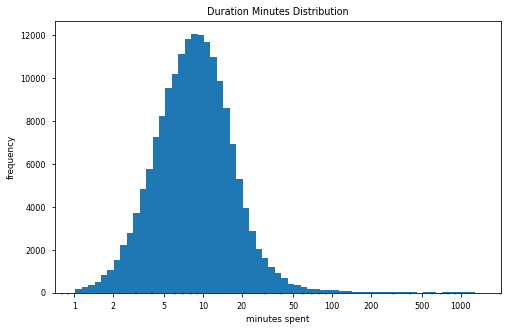

In [28]:
# plotting on a log scale
plt.style.use('seaborn-paper');
def plot_hist(data,size,var,log_plot=False):
    if log_plot:
        plt.figure(figsize=[8, 5]);
        bins=10**np.arange(np.log10(data['duration_min'].min()),np.log10(data['duration_min'].max())+size,size)
        plt.hist(data=data,x=var,bins=bins);
        plt.xscale('log');

    else:
        plt.figure(figsize=[8, 5]);
        bins=np.arange(data[var].min(),data[var].max()+size,size)
        plt.hist(data=data,x=var,bins=bins);

plot_hist(fordbike,0.05,'duration_min',log_plot=True)
plt.xlabel('minutes spent');
plt.title('Duration Minutes Distribution');
plt.ylabel('frequency');
xloc=[1,2,5,10,20,50,100,200,500,1000]
xlabel=['{}'.format(v) for v in xloc]
plt.xticks(xloc,xlabel);

## Total Count Distribution of Categorical Variables.
The count distribution will show us which categories are higher in number.

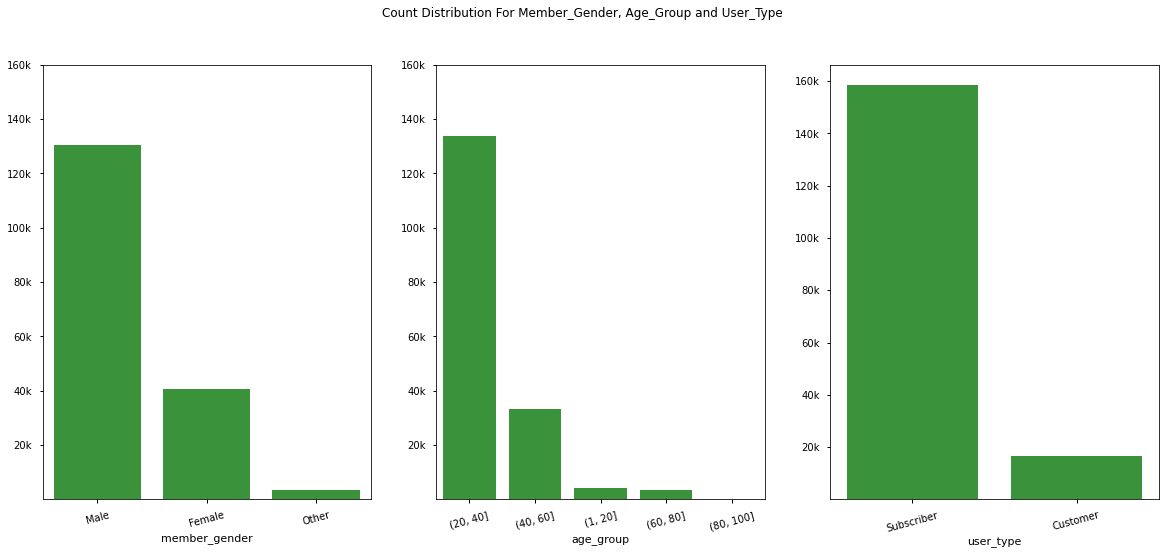

In [24]:
# creating an age_group column to help me see the distribution clearly and easily
fordbike['age_group'] = pd.cut(x=fordbike['user_age'], bins=[1, 20, 40, 60,80, 100]) 
yloc=[20000,40000,60000,80000,100000,120000,140000,160000]
ylabel=['20k','40k','60k','80k','100k','120k','140k','160k']
# plot graph
plot_title='Count Distribution For Member_Gender, Age_Group and User_Type'

def plot_count(data,variables,title):
    fig, ax = plt.subplots(ncols=2,nrows=1, figsize = [20,8])
    fig.suptitle(title);
    color=sb.color_palette()[2]
    if len(variables) < 3:
        order={variables[0]:data[variables[0]].value_counts().index,
               variables[1]:data[variables[1]].value_counts().index,}
    else:
        order={variables[0]:data[variables[0]].value_counts().index,
               variables[1]:data[variables[1]].value_counts().index,
               variables[2]:data[variables[2]].value_counts().index}
    count=1
    for var in variables:
        plt.subplot(1,3,count)
        sb.countplot(data=data,x=var,color=color,order=order[var]);
        plt.xticks(rotation=15)
        plt.ylabel('');
        plt.yticks(yloc,ylabel);
        count+=1
    
        
variables=['member_gender','age_group','user_type']

plot_count(fordbike,variables,plot_title)

## Distribution by Day of the Week , Time of the Day and Bike_share_for_all_trip.
Here we get additional insight for which day and time of day the engagement is more the majority categories

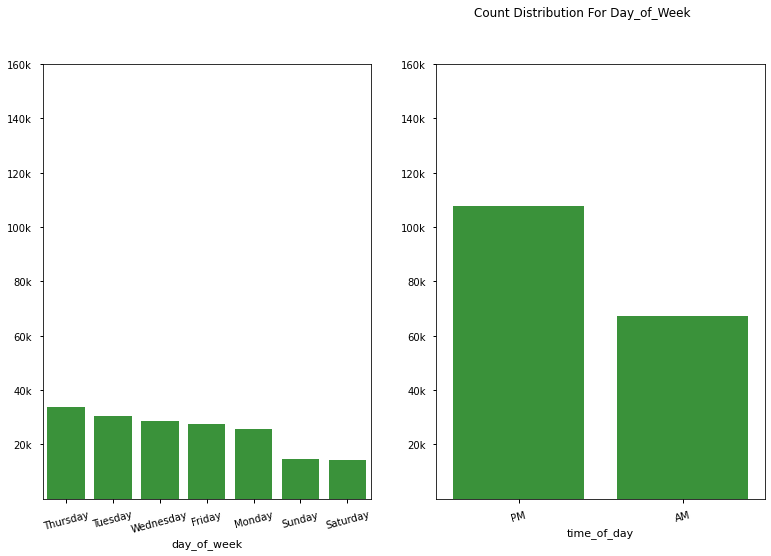

In [25]:
variables=['day_of_week','time_of_day']
plot_title='Count Distribution For Day_of_Week'
plot_count(fordbike,variables,plot_title)

## Riding Duration in mins Vs User_Age Plot
We can see from the plot below how there are more rides congested around ages from around 20 years to about 60years

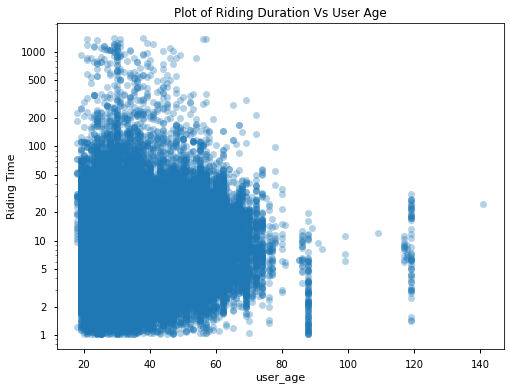

In [24]:
plt.figure(figsize=[8,6])
sb.regplot(data=fordbike,x='user_age',y='duration_min',fit_reg=False,scatter_kws={'alpha':1/3});
plt.yscale('log')
y_loc=[1,2,5,10,20,50,100,200,500,1000]
y_labels=['{}'.format(v) for v in y_loc]
plt.yticks(y_loc,y_labels);
plt.ylabel('Riding Time');
plt.title('Plot of Riding Duration Vs User Age');

## Total  and Mean Riding Times By User_type For by Age_group, Gender and Time_of_day
Two different set of plots here show that though the category 20-40years old Subscriber Males are higher in number they spend lesser time on average riding the bike. Showing they engage more in short trips than longer ones

##### Distribution By Count

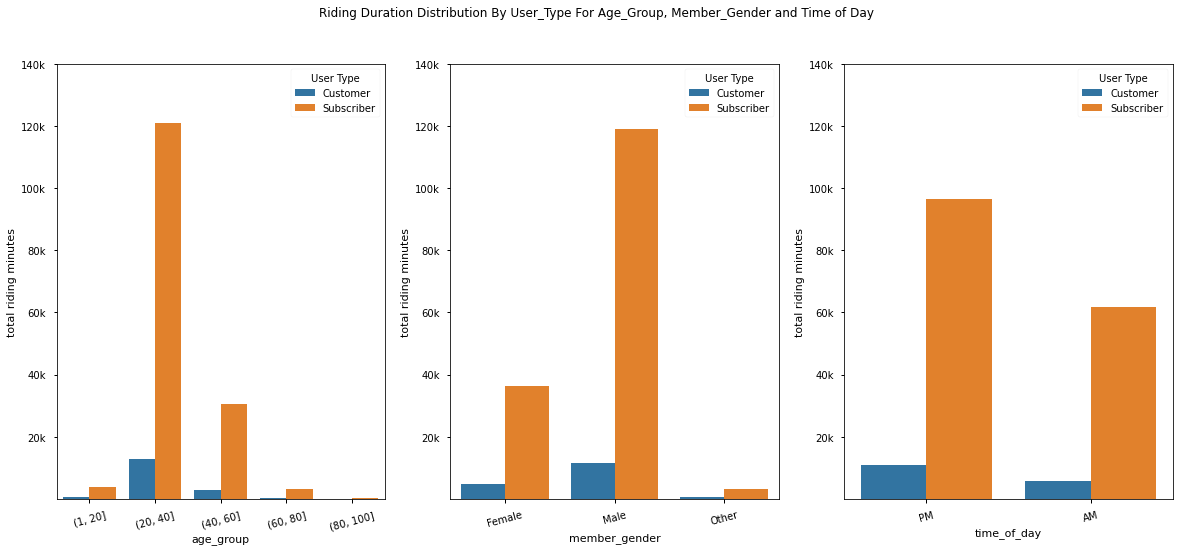

In [25]:
variables=['age_group','member_gender','time_of_day']
count=1
fig, ax = plt.subplots(ncols=len(variables), figsize = [20,8])
for var in variables:
    plt.subplot(1,3,count)
    sb.countplot(data=fordbike,x=var,hue='user_type');
    plt.xticks(rotation=15)
    plt.ylabel('')
    plt.legend(framealpha = 0.5, title = 'User Type');
    yloc=[20000,40000,60000,80000,100000,120000,140000]
    y_labels=['20k','40k','60k','80k','100k','120k','140k']
    plt.yticks(yloc,y_labels);
    plt.ylabel('total riding minutes');
    count+=1
fig.suptitle('Riding Duration Distribution By User_Type For Age_Group, Member_Gender and Time of Day');


##### Distribution By Mean

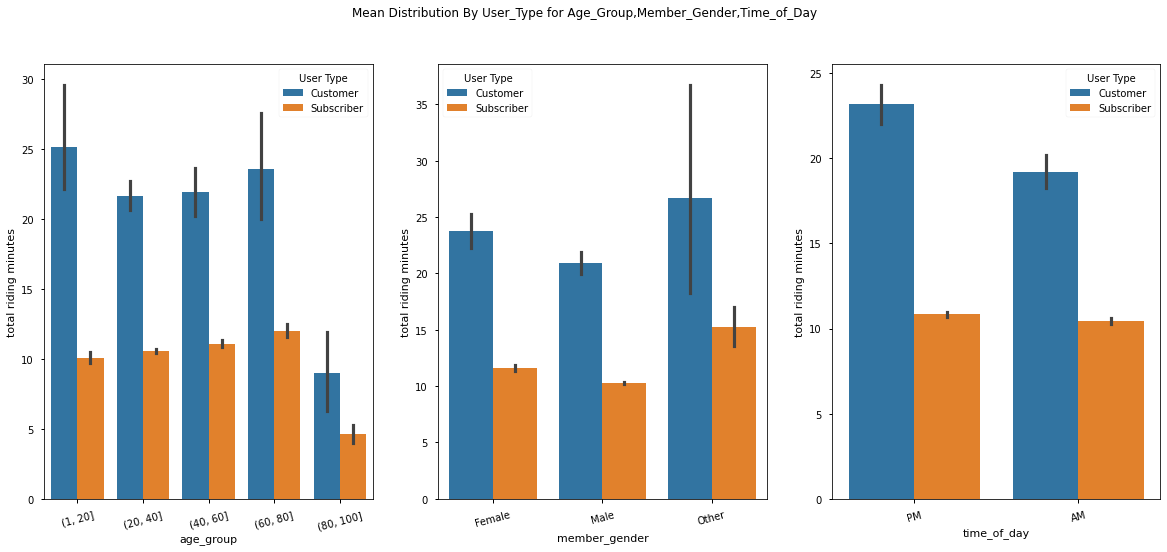

In [26]:
variables=['age_group','member_gender','time_of_day']
count=1
fig, ax = plt.subplots(ncols=len(variables), figsize = [20,8])
fig.suptitle('Mean Distribution By User_Type for Age_Group,Member_Gender,Time_of_Day')
for var in variables:
    plt.subplot(1,3,count)
    sb.barplot(data=fordbike,x=var,y='duration_min',hue='user_type');
    plt.xticks(rotation=15)
    plt.ylabel('')
    plt.legend(framealpha = 0.5, title = 'User Type');
    plt.ylabel('total riding minutes');
    count+=1

## Average Duration Minutes by User_Type for Member_Gender, Age_Group and Bike_share_for_all_trip.
Going deeper to see how far the trend goes across various categories.
    

In [27]:
cat_means = fordbike.groupby(['user_type', 'member_gender']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_Avg')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_Avg')
# sb.heatmap(cat_means, annot = True, fmt = '.3f',
#            cbar_kws = {'label' : 'mean(num_var2)'})
cat_means

cat_sum = fordbike.groupby(['user_type', 'member_gender']).sum()['duration_min']
cat_sum = cat_sum.reset_index(name = 'duration_min_Avg')
cat_sum = cat_sum.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_min_Avg')
cat_sum

user_type,Customer,Subscriber
member_gender,,
Female,109729.066667,4.199693e+05
Male,240125.833333,1.222333e+06
Other,12017.250000,4.860370e+04


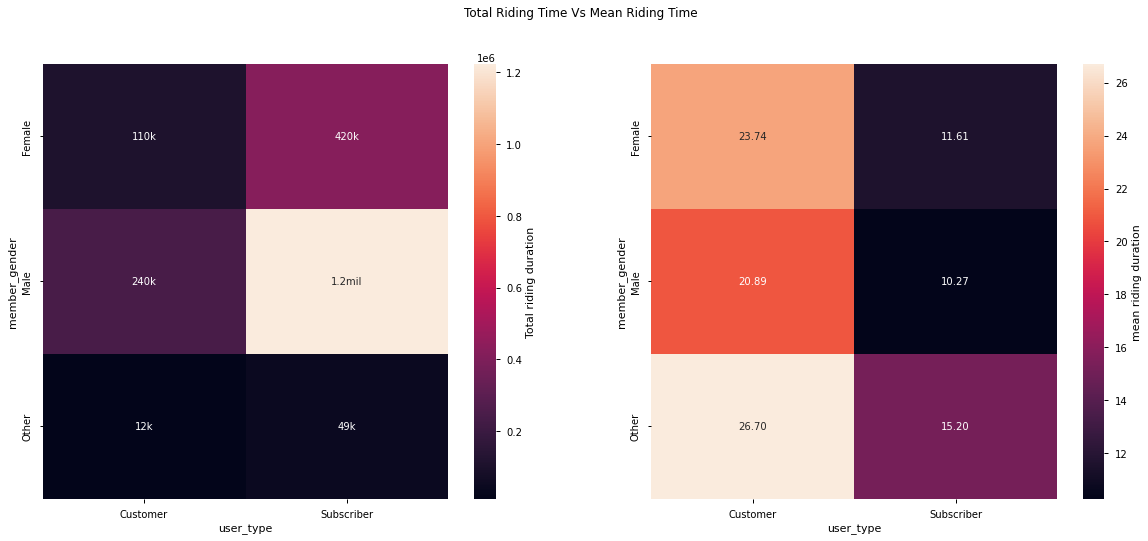

In [28]:
fig, ax = plt.subplots(ncols = 2, figsize = [20,8])
labels =  np.array([['110k','420k'],['240k','1.2mil'],['12k','49k']])  
sb.heatmap(cat_sum, annot = labels,fmt='', ax = ax[0],
           cbar_kws = {'label' : 'Total riding duration'});
sb.heatmap(cat_means, annot = True, fmt = '.2f', ax = ax[1],
           cbar_kws = {'label' : 'mean riding duration'});    
fig.suptitle('Total Riding Time Vs Mean Riding Time ');

##### Further Investigation
> The plot below looks at a wider range of variables and still notices the same trend of variables with more count having lesser mean riding duration. Customer type spend more time on average even though they are fewer in count.

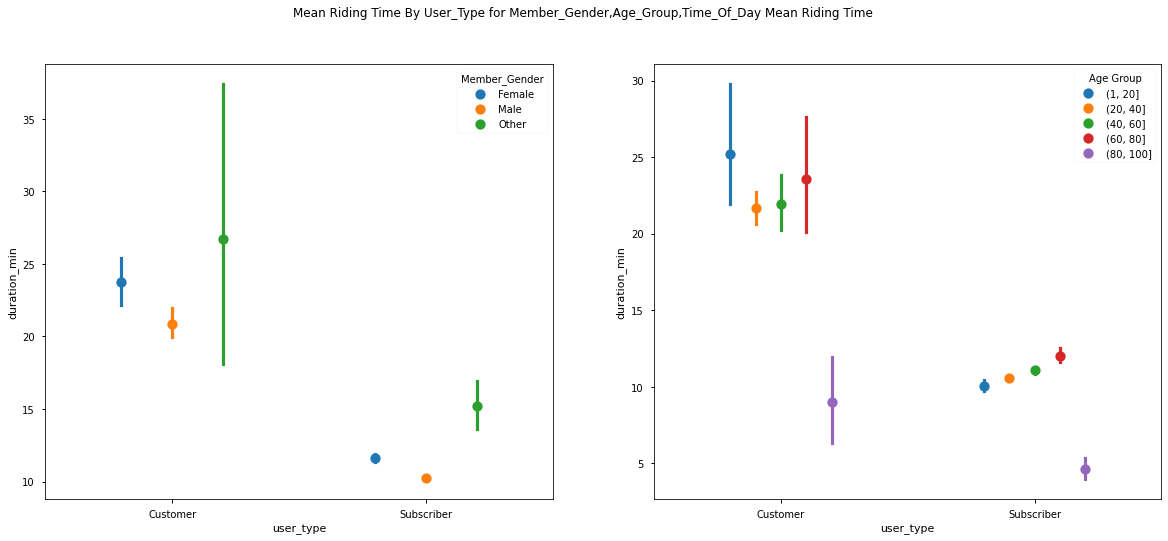

In [29]:
fig, ax = plt.subplots(ncols = 2, figsize = [20,8])

order=fordbike.member_gender.value_counts().index 
plt.subplot(1,2,1)

sb.pointplot(data = fordbike, x = 'user_type', y = 'duration_min', hue = 'member_gender',linestyles='',dodge=0.4);
plt.legend(framealpha = 0.5, title = 'Member_Gender');
plt.subplot(1,2,2)
sb.pointplot(data = fordbike, x = 'user_type', y = 'duration_min', hue = 'age_group',linestyles='',dodge=0.4);
plt.legend( framealpha = 0.5, title = 'Age Group');
fig.suptitle('Mean Riding Time By User_Type for Member_Gender,Age_Group,Time_Of_Day Mean Riding Time ');


##### Same Trend is Noticed Below

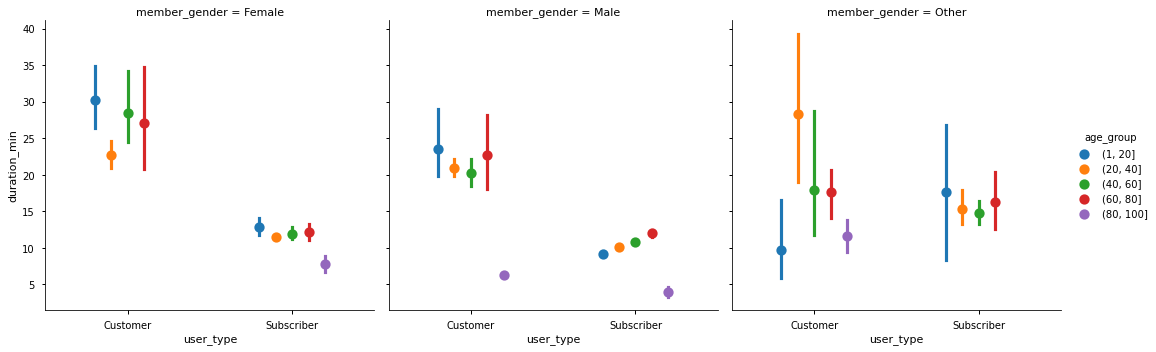

In [30]:
# fig, ax = plt.subplots(ncols = 3, figsize = [20,8])

sb.catplot(data=fordbike,
           x='user_type',
           y='duration_min',
           hue='age_group',
           kind='point',
           dodge=0.4,
           col='member_gender',
           linestyles='');


## Conclusion
This presentation shows without a doubt that Male Subscribers between 20 to 40 years have more count in Ford Go-Bike service but spend shorter time per trip as compared to other groups except for the "Other" gender which shows a very high variance in their distribution due to their little number and inconsistent riding durations. 
The company will want to present this to the marketing department for further action.